>> ## Data Breach Analytics 2005 - 2017 
> (Part IV - Supervised Text Classification Modeling part 2 non-text features) - breaches only
#### by Miriam Rodriguez

Classification models need to be created to determine the risk of a data breach:
- the likelihood of a specific type of breach
- which organization type is likely to be hit
- what is the correlation

Separate the features to predict each type of breach and which organizations are affected

Organizations could develop security systems as a result of this study.


# Importing packages 

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from pandas.core import datetools

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import warnings
warnings.filterwarnings(action= 'ignore')  # To ignore all warnings that arise here to enhance clarity

## Read cleaned data

In [2]:
#import breach data ... open or read the bank data
df=pd.read_csv("databreach_cleaned.csv")
df.head()


,Breach_Year,Company,State,Breach_Type,Organization_Type,Total_Recs,Description,Latitude,Longitude,Breach_Type_CAT,Organization_Type_CAT,State_CAT,Year_CAT,GDP
0,2006,"Deloitte & Touche, McAfee",United States,PORT,BSO,9290,"An external auditor lost a CD with names, Soci...",37.090240,-95.712891,5,2,0,2,72466970
1,2007,"TennCare, Americhoice Inc.",United States,PORT,MED,67000,"There are 67,000 TennCare \r\n enro...",35.960638,-83.920739,5,6,0,3,75725457
2,2007,Mercer Health and Benefits,United States,PORT,BSF,10500,A laptop computer was stolen from a vehicle.,37.090240,-95.712891,5,1,0,3,75725457
3,2007,"Fidelity Investments, Dairy Farmers of America",United States,PORT,BSF,69,A Fidelity laptop used by a former Fidelity em...,37.090240,-95.712891,5,1,0,3,75725457
4,2007,Dai Nippon,United States,INSD,BSO,0,A former contract worker of a Japanese commerc...,37.090240,-95.712891,3,2,0,3,75725457


# Data Prep

In [3]:
#drop or remove the column 'id' since this column is not used in the analysis and disply the result
df_stat = df.drop(['GDP', 'Latitude', 'Longitude', 'Breach_Type', 'Organization_Type', 'State', 'Company', 'Description', 'Year_CAT'], axis=1)
df_stat.head()


,Breach_Year,Total_Recs,Breach_Type_CAT,Organization_Type_CAT,State_CAT
0,2006,9290,5,2,0
1,2007,67000,5,6,0
2,2007,10500,5,1,0
3,2007,69,5,1,0
4,2007,0,3,2,0


In [4]:
#  Convert Total Records either harm (>1) or no harm (0) in terms of records breached.

df_stat["Total_Recs"][df_stat["Total_Recs"]>0] = 1
df_stat.head()


,Breach_Year,Total_Recs,Breach_Type_CAT,Organization_Type_CAT,State_CAT
0,2006,1,5,2,0
1,2007,1,5,6,0
2,2007,1,5,1,0
3,2007,1,5,1,0
4,2007,0,3,2,0


In [5]:
#describe the data

df_stat.describe()


,Breach_Year,Total_Recs,Breach_Type_CAT,Organization_Type_CAT,State_CAT
count,8177.000000,8177.000000,8177.000000,8177.000000,8177.000000
mean,2012.204965,0.728996,4.015042,4.534915,23.191513
std,3.425944,0.444505,1.992745,1.825506,15.301632
min,2005.000000,0.000000,0.000000,1.000000,0.000000
25%,2010.000000,0.000000,2.000000,3.000000,9.000000
50%,2012.000000,1.000000,4.000000,6.000000,21.000000
75%,2015.000000,1.000000,5.000000,6.000000,36.000000
max,2018.000000,1.000000,7.000000,7.000000,52.000000


In [6]:
#show the information about the dataset
df_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8177 entries, 0 to 8176
Data columns (total 5 columns):
Breach_Year              8177 non-null int64
Total_Recs               8177 non-null int64
Breach_Type_CAT          8177 non-null int64
Organization_Type_CAT    8177 non-null int64
State_CAT                8177 non-null int64
dtypes: int64(5)
memory usage: 319.5 KB


# Classification Model building

In [7]:
# rename columns Harm
df_stat = df_stat.rename(columns={'Total_Recs': 'Harm'})

In [8]:
df_stat

,Breach_Year,Harm,Breach_Type_CAT,Organization_Type_CAT,State_CAT
0,2006,1,5,2,0
1,2007,1,5,6,0
2,2007,1,5,1,0
3,2007,1,5,1,0
4,2007,0,3,2,0
5,2007,1,7,6,0
6,2008,0,5,2,0
7,2009,0,4,5,0
8,2009,1,2,4,0
9,2010,1,4,6,0


## Decision Tree Model Building, Validation, Evaluation


In [9]:
#set X, y value
y = df_stat['Harm']
X = df_stat.drop(['Harm'], axis=1)

In [10]:
# evaluate the model by splitting into train (70%) and test sets (30%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
#Model evaluation

print  metrics.accuracy_score(y_test, dt.predict(X_test))
print  metrics.confusion_matrix(y_test, dt.predict(X_test))
print  metrics.classification_report(y_test, dt.predict(X_test))
print  metrics.roc_auc_score(y_test, dt.predict(X_test))

0.743683781581
[[ 354  318]
 [ 311 1471]]
             precision    recall  f1-score   support

          0       0.53      0.53      0.53       672
          1       0.82      0.83      0.82      1782

avg / total       0.74      0.74      0.74      2454

0.676131353215


Question: Interpret the results of confusion matrix
    
- The decision tree model is 74% accurate. Therefore, we expect that the model will be about 74% accurate when the model is applied into a real-world situation 
- 355 incidents were correctly classified as not causing harm, 319 incidents were misclassified as not causing harm.
- 1463 incidents were correctly classified as causing harm, 317 incidents were misclassified as causing harm.
- Total number in testing dataset is 2454, total harm = 672 (355 + 317), total with no harm = 1782 (319 + 1463). 
- Overall accuracy calculated as correctly classified 355 + 1463 / 2454 total in test dsn = 74%

In [12]:
Breach_Type_dm = pd.get_dummies(df_stat['Breach_Type_CAT'], prefix='Breach_Type')
df_stat_sp = df_stat.join(Breach_Type_dm)
df_stat_sp.head()

,Breach_Year,Harm,Breach_Type_CAT,Organization_Type_CAT,State_CAT,Breach_Type_0,Breach_Type_1,Breach_Type_2,Breach_Type_3,Breach_Type_4,Breach_Type_5,Breach_Type_6,Breach_Type_7
0,2006,1,5,2,0,0,0,0,0,0,1,0,0
1,2007,1,5,6,0,0,0,0,0,0,1,0,0
2,2007,1,5,1,0,0,0,0,0,0,1,0,0
3,2007,1,5,1,0,0,0,0,0,0,1,0,0
4,2007,0,3,2,0,0,0,0,1,0,0,0,0


In [13]:
# rename columns Description of breach types
df_stat_sp = df_stat_sp.rename(columns={'Breach_Type_1': 'CreditCard', 'Breach_Type_2': 'Hacking', 'Breach_Type_3': 'Insider', 'Breach_Type_4': 'Physical', 'Breach_Type_5': 'Portable', 'Breach_Type_6': 'Stationary', 'Breach_Type_7': 'Disclosure', 'Breach_Type_0': 'Unknown'})

In [14]:
df_stat_sp.head()

,Breach_Year,Harm,Breach_Type_CAT,Organization_Type_CAT,State_CAT,Unknown,CreditCard,Hacking,Insider,Physical,Portable,Stationary,Disclosure
0,2006,1,5,2,0,0,0,0,0,0,1,0,0
1,2007,1,5,6,0,0,0,0,0,0,1,0,0
2,2007,1,5,1,0,0,0,0,0,0,1,0,0
3,2007,1,5,1,0,0,0,0,0,0,1,0,0
4,2007,0,3,2,0,0,0,0,1,0,0,0,0


In [15]:
df_stat_sp = df_stat_sp.drop(['Breach_Type_CAT'], axis=1)
df_stat_sp.head()

,Breach_Year,Harm,Organization_Type_CAT,State_CAT,Unknown,CreditCard,Hacking,Insider,Physical,Portable,Stationary,Disclosure
0,2006,1,2,0,0,0,0,0,0,1,0,0
1,2007,1,6,0,0,0,0,0,0,1,0,0
2,2007,1,1,0,0,0,0,0,0,1,0,0
3,2007,1,1,0,0,0,0,0,0,1,0,0
4,2007,0,2,0,0,0,0,1,0,0,0,0


## Model Creation and Deployment: Predict y values using the decision tree classifiers.
- Create and load scoringdataset.csv (scoring dataset). This dataset has no y value, representing the future. Decision model will be deployed to determine if we can predict the type of breach.

In [16]:
#set X, y value
y = df_stat_sp['Hacking']
X = df_stat_sp.drop(['Hacking'], axis=1)

In [17]:
# evaluate the model by splitting into train (70%) and test sets (30%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
#Model evaluation

print  metrics.accuracy_score(y_test, dt.predict(X_test))
print  metrics.confusion_matrix(y_test, dt.predict(X_test))
print  metrics.classification_report(y_test, dt.predict(X_test))
print  metrics.roc_auc_score(y_test, dt.predict(X_test))

1.0
[[1708    0]
 [   0  746]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1708
          1       1.00      1.00      1.00       746

avg / total       1.00      1.00      1.00      2454

1.0


#### Model Deployment

In [19]:
df_score_h = df_stat_sp.drop(['Hacking'], axis=1)
df_score_h.head()

,Breach_Year,Harm,Organization_Type_CAT,State_CAT,Unknown,CreditCard,Insider,Physical,Portable,Stationary,Disclosure
0,2006,1,2,0,0,0,0,0,1,0,0
1,2007,1,6,0,0,0,0,0,1,0,0
2,2007,1,1,0,0,0,0,0,1,0,0
3,2007,1,1,0,0,0,0,0,1,0,0
4,2007,0,2,0,0,0,1,0,0,0,0


In [30]:
df_score_h.to_csv("scoringdataset_hack.csv",index=False)

In [31]:
# load scoringdataset_hack.csv
score_h=pd.read_csv("scoringdataset_hack.csv")
print score_h.head()

   Breach_Year  Harm  Organization_Type_CAT  State_CAT  Unknown  CreditCard  \
0         2006     1                      2          0        0           0   
1         2007     1                      6          0        0           0   
2         2007     1                      1          0        0           0   
3         2007     1                      1          0        0           0   
4         2007     0                      2          0        0           0   

   Insider  Physical  Portable  Stationary  Disclosure  
0        0         0         1           0           0  
1        0         0         1           0           0  
2        0         0         1           0           0  
3        0         0         1           0           0  
4        1         0         0           0           0  


In [32]:
# finally generate the predicted y value
predictedY = dt.predict(score_h)
predictedY

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [33]:
predictedY = pd.DataFrame(predictedY, columns=['predicted Y'])
predictedY.head(20)

,predicted Y
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,0


In [28]:
# Check hacking column to see if matches predicted Y
df_stat_sp.Hacking.head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     0
10    0
11    0
12    0
13    1
14    1
15    0
16    0
17    0
18    0
19    0
Name: Hacking, dtype: uint8

In [34]:
data_h = score_h.join(predictedY) 
data_h.head(20)

,Breach_Year,Harm,Organization_Type_CAT,State_CAT,Unknown,CreditCard,Insider,Physical,Portable,Stationary,Disclosure,predicted Y
0,2006,1,2,0,0,0,0,0,1,0,0,0
1,2007,1,6,0,0,0,0,0,1,0,0,0
2,2007,1,1,0,0,0,0,0,1,0,0,0
3,2007,1,1,0,0,0,0,0,1,0,0,0
4,2007,0,2,0,0,0,1,0,0,0,0,0
5,2007,1,6,0,0,0,0,0,0,0,1,0
6,2008,0,2,0,0,0,0,0,1,0,0,0
7,2009,0,5,0,0,0,0,1,0,0,0,0
8,2009,1,4,0,0,0,0,0,0,0,0,1
9,2010,1,6,0,0,0,0,1,0,0,0,0


### Hacking was predicted correctly

#### Model Create

In [35]:
#set X, y value
y = df_stat_sp['CreditCard']
X = df_stat_sp.drop(['CreditCard'], axis=1)

In [36]:
# evaluate the model by splitting into train (70%) and test sets (30%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:
#Model evaluation

print  metrics.accuracy_score(y_test, dt.predict(X_test))
print  metrics.confusion_matrix(y_test, dt.predict(X_test))
print  metrics.classification_report(y_test, dt.predict(X_test))
print  metrics.roc_auc_score(y_test, dt.predict(X_test))

0.999185004075
[[2434    2]
 [   0   18]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2436
          1       0.90      1.00      0.95        18

avg / total       1.00      1.00      1.00      2454

0.999589490969


#### Model Deployment

In [38]:
df_score_cc = df_stat_sp.drop(['CreditCard'], axis=1)
df_score_cc.head()

,Breach_Year,Harm,Organization_Type_CAT,State_CAT,Unknown,Hacking,Insider,Physical,Portable,Stationary,Disclosure
0,2006,1,2,0,0,0,0,0,1,0,0
1,2007,1,6,0,0,0,0,0,1,0,0
2,2007,1,1,0,0,0,0,0,1,0,0
3,2007,1,1,0,0,0,0,0,1,0,0
4,2007,0,2,0,0,0,1,0,0,0,0


In [39]:
df_score_cc.to_csv("scoringdataset_card.csv",index=False)

In [40]:
# load scoringdataset_card.csv
score_cc=pd.read_csv("scoringdataset_card.csv")
print score_cc.head()

   Breach_Year  Harm  Organization_Type_CAT  State_CAT  Unknown  Hacking  \
0         2006     1                      2          0        0        0   
1         2007     1                      6          0        0        0   
2         2007     1                      1          0        0        0   
3         2007     1                      1          0        0        0   
4         2007     0                      2          0        0        0   

   Insider  Physical  Portable  Stationary  Disclosure  
0        0         0         1           0           0  
1        0         0         1           0           0  
2        0         0         1           0           0  
3        0         0         1           0           0  
4        1         0         0           0           0  


In [41]:
# finally generate the predicted y value
predictedY = dt.predict(score_cc)
predictedY

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [42]:
predictedY = pd.DataFrame(predictedY, columns=['predicted Y'])
predictedY.head(20)

,predicted Y
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [43]:
data_cc = score_cc.join(predictedY) 
data_cc.head(20)

,Breach_Year,Harm,Organization_Type_CAT,State_CAT,Unknown,Hacking,Insider,Physical,Portable,Stationary,Disclosure,predicted Y
0,2006,1,2,0,0,0,0,0,1,0,0,0
1,2007,1,6,0,0,0,0,0,1,0,0,0
2,2007,1,1,0,0,0,0,0,1,0,0,0
3,2007,1,1,0,0,0,0,0,1,0,0,0
4,2007,0,2,0,0,0,1,0,0,0,0,0
5,2007,1,6,0,0,0,0,0,0,0,1,0
6,2008,0,2,0,0,0,0,0,1,0,0,0
7,2009,0,5,0,0,0,0,1,0,0,0,0
8,2009,1,4,0,0,1,0,0,0,0,0,0
9,2010,1,6,0,0,0,0,1,0,0,0,0


In [45]:
# Check credit card column to see if matches predicted Y
df_stat_sp.CreditCard.head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: CreditCard, dtype: uint8

### Credit Card was predicted correctly


#### Model Creation

In [46]:
#set X, y value
y = df_stat_sp['Disclosure']
X = df_stat_sp.drop(['Disclosure'], axis=1)

In [47]:
# evaluate the model by splitting into train (70%) and test sets (30%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [48]:
#Model evaluation

print  metrics.accuracy_score(y_test, dt.predict(X_test))
print  metrics.confusion_matrix(y_test, dt.predict(X_test))
print  metrics.classification_report(y_test, dt.predict(X_test))
print  metrics.roc_auc_score(y_test, dt.predict(X_test))

1.0
[[1950    0]
 [   0  504]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1950
          1       1.00      1.00      1.00       504

avg / total       1.00      1.00      1.00      2454

1.0


#### Model Deployment

In [49]:
df_score_d = df_stat_sp.drop(['Disclosure'], axis=1)
df_score_d.head()

,Breach_Year,Harm,Organization_Type_CAT,State_CAT,Unknown,CreditCard,Hacking,Insider,Physical,Portable,Stationary
0,2006,1,2,0,0,0,0,0,0,1,0
1,2007,1,6,0,0,0,0,0,0,1,0
2,2007,1,1,0,0,0,0,0,0,1,0
3,2007,1,1,0,0,0,0,0,0,1,0
4,2007,0,2,0,0,0,0,1,0,0,0


In [50]:
df_score_d.to_csv("scoringdataset_disc.csv",index=False)

In [51]:
# load scoringdataset_card.csv
score_d=pd.read_csv("scoringdataset_disc.csv")
print score_d.head()

   Breach_Year  Harm  Organization_Type_CAT  State_CAT  Unknown  CreditCard  \
0         2006     1                      2          0        0           0   
1         2007     1                      6          0        0           0   
2         2007     1                      1          0        0           0   
3         2007     1                      1          0        0           0   
4         2007     0                      2          0        0           0   

   Hacking  Insider  Physical  Portable  Stationary  
0        0        0         0         1           0  
1        0        0         0         1           0  
2        0        0         0         1           0  
3        0        0         0         1           0  
4        0        1         0         0           0  


In [52]:
# finally generate the predicted y value
predictedY = dt.predict(score_d)
predictedY

array([0, 0, 0, ..., 0, 1, 1], dtype=uint8)

In [53]:
predictedY = pd.DataFrame(predictedY, columns=['predicted Y'])
predictedY.head(20)

,predicted Y
0,0
1,0
2,0
3,0
4,0
5,1
6,0
7,0
8,0
9,0


### Disclosure was predicted correctly for first 20


In [54]:
# Check disclosure column to see if matches predicted Y
df_stat_sp.Disclosure.head(20)

0     0
1     0
2     0
3     0
4     0
5     1
6     0
7     0
8     0
9     0
10    1
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: Disclosure, dtype: uint8

In [55]:
data_d = score_d.join(predictedY) 
data_d.head(20)

,Breach_Year,Harm,Organization_Type_CAT,State_CAT,Unknown,CreditCard,Hacking,Insider,Physical,Portable,Stationary,predicted Y
0,2006,1,2,0,0,0,0,0,0,1,0,0
1,2007,1,6,0,0,0,0,0,0,1,0,0
2,2007,1,1,0,0,0,0,0,0,1,0,0
3,2007,1,1,0,0,0,0,0,0,1,0,0
4,2007,0,2,0,0,0,0,1,0,0,0,0
5,2007,1,6,0,0,0,0,0,0,0,0,1
6,2008,0,2,0,0,0,0,0,0,1,0,0
7,2009,0,5,0,0,0,0,0,1,0,0,0
8,2009,1,4,0,0,0,1,0,0,0,0,0
9,2010,1,6,0,0,0,0,0,1,0,0,0


> # Logistic Regression
- For logistic regression & logit, dummy variables for categorical columns have already been created (Breach_type or Organization_type)
- When declaring X and y, X_lr and y_lr will be used to not to overwrite X and y since X and y will be used for knn and other algorithms (e.g., random forest, extratreeclassifier)


In [56]:
print df_stat_sp.dtypes

Breach_Year              int64
Harm                     int64
Organization_Type_CAT    int64
State_CAT                int64
Unknown                  uint8
CreditCard               uint8
Hacking                  uint8
Insider                  uint8
Physical                 uint8
Portable                 uint8
Stationary               uint8
Disclosure               uint8
dtype: object


In [58]:
# correlation analysis & heatmap
df_stat_sp.corr()

,Breach_Year,Harm,Organization_Type_CAT,State_CAT,Unknown,CreditCard,Hacking,Insider,Physical,Portable,Stationary,Disclosure
Breach_Year,1.000000,-0.030102,0.188673,-0.066180,-0.041560,-0.032603,0.255300,-0.087134,0.014403,-0.291596,-0.157075,0.097471
Harm,-0.030102,1.000000,0.383814,0.077331,0.008775,-0.053239,-0.169267,-0.069123,0.129257,0.015403,0.003971,0.099411
Organization_Type_CAT,0.188673,0.383814,1.000000,0.047470,-0.011383,-0.113151,-0.216258,-0.052762,0.262098,-0.046445,-0.008264,0.089716
State_CAT,-0.066180,0.077331,0.047470,1.000000,-0.012452,-0.001586,-0.037782,-0.024191,0.029506,0.018602,0.011272,0.013525
Unknown,-0.041560,0.008775,-0.011383,-0.012452,1.000000,-0.016229,-0.115273,-0.050273,-0.090490,-0.072490,-0.031408,-0.091063
CreditCard,-0.032603,-0.053239,-0.113151,-0.001586,-0.016229,1.000000,-0.059564,-0.025977,-0.046758,-0.037457,-0.016229,-0.047054
Hacking,0.255300,-0.169267,-0.216258,-0.037782,-0.115273,-0.059564,1.000000,-0.184513,-0.332118,-0.266054,-0.115273,-0.334222
Insider,-0.087134,-0.069123,-0.052762,-0.024191,-0.050273,-0.025977,-0.184513,1.000000,-0.144844,-0.116032,-0.050273,-0.145762
Physical,0.014403,0.129257,0.262098,0.029506,-0.090490,-0.046758,-0.332118,-0.144844,1.000000,-0.208854,-0.090490,-0.262367
Portable,-0.291596,0.015403,-0.046445,0.018602,-0.072490,-0.037457,-0.266054,-0.116032,-0.208854,1.000000,-0.072490,-0.210177


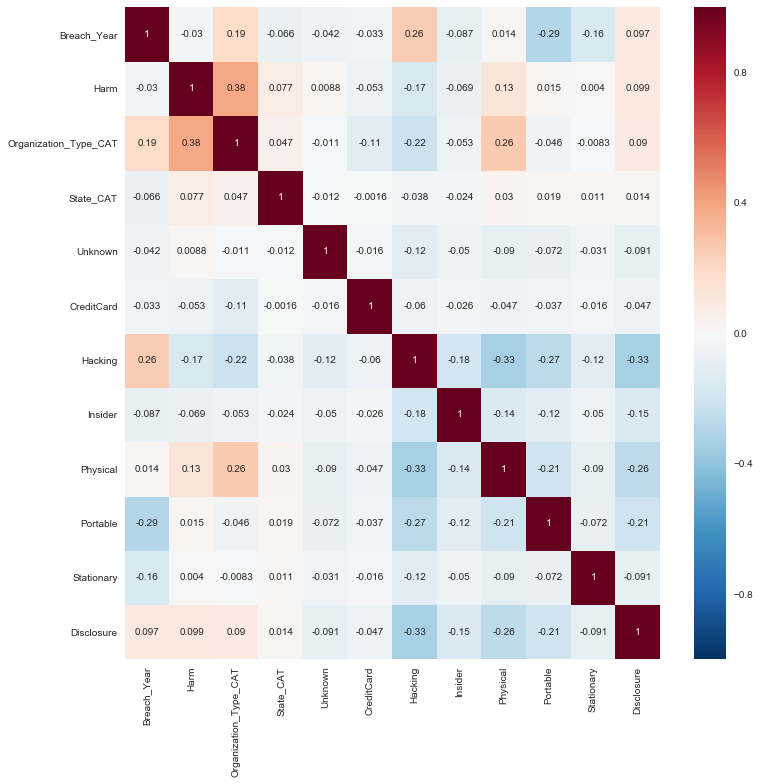

In [59]:
plt.figure(figsize=(12,12))
sns.heatmap(df_stat_sp.corr(), annot=True)

What are the findings from correlation analysis?
- The higher values seem to occur with hacking breaches.
- Hacking and unknown have a negative correlation.
- Physical breaches are also among the higher scores.
- For the most part the correlation scores appear to be low.

#### For this example we will use Disclosure which had a higher correlation with Organization Type

In [88]:
# declaring X_lr, y_lr (instead of X and y). We don't want to overwrite X and y
y_lr = df_stat_sp['Harm']
X_lr = df_stat_sp.drop(['Harm'], axis=1)

In [89]:
X_lr.head(2)

,Breach_Year,Organization_Type_CAT,State_CAT,Unknown,CreditCard,Hacking,Insider,Physical,Portable,Stationary,Disclosure
0,2006,2,0,0,0,0,0,0,1,0,0
1,2007,6,0,0,0,0,0,0,1,0,0


In [90]:
# evaluate the model by splitting into train and test sets (split validation) 70%/30%

X_train, X_test, y_train, y_test = train_test_split(X_lr, y_lr, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [91]:
#Split valuation. 
#Report the following model evaluation metrics: overall model accuracy, confusion matrix, AUC score, classification report
print  metrics.accuracy_score(y_test, lr.predict(X_test))
print  metrics.confusion_matrix(y_test, lr.predict(X_test))
print  metrics.classification_report(y_test, lr.predict(X_test))
print  metrics.roc_auc_score(y_test, lr.predict(X_test))

0.764058679707
[[ 267  405]
 [ 174 1608]]
             precision    recall  f1-score   support

          0       0.61      0.40      0.48       672
          1       0.80      0.90      0.85      1782

avg / total       0.75      0.76      0.75      2454

0.649839165464


**100 model accuracy for Disclosure**
- **100 AUC score; AUC = Area Under Curve**
    - TPR = (true positives/total positives) = / =  
    - FPR = (false positives/total negatives) = / =  

In [93]:
# evaluate the decision tree model for harm using 10-fold cross-validation
cross_scores = cross_val_score(lr, X_lr, y_lr, scoring='accuracy', cv=10)
print cross_scores
print cross_scores.mean()

[ 0.72649573  0.71393643  0.79706601  0.73594132  0.78361858  0.70537897
  0.72705018  0.80783354  0.74785802  0.72215422]
0.746733300762


> # Logit Model

In [94]:
# instantiate a logit model, and fit with X_lr and y_lr
# this is like a statistical model, rather than a data mining model ...
logit = sm.Logit(y_lr, X_lr) 
model_logit = logit.fit_regularized()

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.500314903108
            Iterations: 98
            Function evaluations: 107
            Gradient evaluations: 98


In [95]:
# logit pred_table()
model_logit.predict()

array([ 0.55364701,  0.87688675,  0.42536363, ...,  0.42545876,
        0.8878126 ,  0.8878126 ])

In [96]:
model_logit.pred_table()

array([[  841.,  1375.],
       [  584.,  5377.]])

Interpret the accuracy based on the pred_table

- The model accuracy is ( + ) /  = 0.000
-  appears to be the main predictor


In [97]:
# look at the confidence interval of each coeffecient
print model_logit.conf_int()

                               0           1
Breach_Year            -0.080732   -0.046062
Organization_Type_CAT   0.422650    0.482977
State_CAT               0.005080    0.012159
Unknown                91.760915  161.454775
CreditCard             91.287975  160.991338
Hacking                91.335113  161.099916
Insider                91.136550  160.815554
Physical               91.816855  161.520305
Portable               91.667998  161.300359
Stationary             91.516340  161.124704
Disclosure             91.972221  161.705084


> # K-nearest Neighbors (knn)
- Pick the best k value first.

Text(0,0.5,'accuracy')

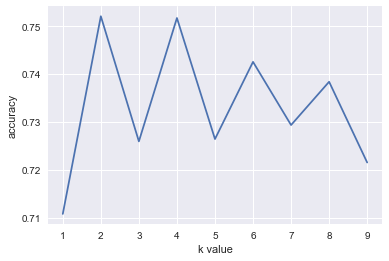

In [98]:
# search for an optimal value of K
k_range = range(1, 10)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(np.mean(cross_val_score(knn, X, y, cv=10, scoring='accuracy')))

# plot the K values (x-axis) versus the 10-fold CV score (y-axis)
plt.figure()
plt.plot(k_range, scores)
plt.xlabel('k value')
plt.ylabel('accuracy')



## Optimal k value using Grid Search -  K value = 2

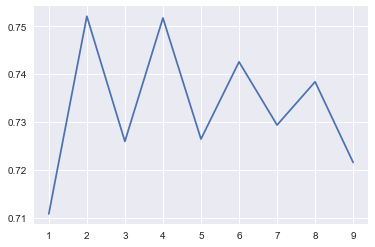

In [99]:
# automatic grid search for an optimal value of K

from sklearn.grid_search import GridSearchCV

knn = KNeighborsClassifier()
k_range = range(1, 10)
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

# check the results of the grid search
grid.grid_scores_
grid_mean_scores = [result[1] for result in grid.grid_scores_]
plt.figure()
plt.plot(k_range, grid_mean_scores)
plt.show()


In [100]:
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.752109575639
{'n_neighbors': 2}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')


In [101]:
# evaluate the model by splitting into train and test sets & develop knn model (name it as knn). 
# Use the optimal k value
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [102]:
#Model evaluation without valdation
print  metrics.accuracy_score(y_test, knn.predict(X_test))
print  metrics.confusion_matrix(y_test, knn.predict(X_test))
print  metrics.classification_report(y_test, knn.predict(X_test))
print  metrics.roc_auc_score(y_test, knn.predict(X_test))

0.869193154034
[[1818  132]
 [ 189  315]]
             precision    recall  f1-score   support

          0       0.91      0.93      0.92      1950
          1       0.70      0.62      0.66       504

avg / total       0.86      0.87      0.87      2454

0.778653846154


In [103]:
# evaluate the decision tree model using 10-fold cross-validation
scores = cross_val_score(knn, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.83129584  0.59290954  0.700489    0.63325183  0.63814181  0.74694377
  0.77506112  0.83618582  0.80416157  0.65686275]
0.721530304041


> # Random Forest

In [104]:
# develop a random forest model
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X, y)
clf.score(X,y)

1.0

In [105]:
# generate evaluation metrics
print metrics.accuracy_score(y, clf.predict(X)) #overall accuracy
print metrics.confusion_matrix(y, clf.predict(X))
print metrics.classification_report(y, clf.predict(X))

1.0
[[6469    0]
 [   0 1708]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      6469
          1       1.00      1.00      1.00      1708

avg / total       1.00      1.00      1.00      8177



In [106]:
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), X.columns))

Features sorted by their rank:
[(0.0065, 'Harm'), (0.0111, 'State_CAT'), (0.022, 'Organization_Type_CAT'), (0.0228, 'CreditCard'), (0.0415, 'Breach_Year'), (0.0479, 'Unknown'), (0.0607, 'Stationary'), (0.1497, 'Insider'), (0.1726, 'Portable'), (0.2267, 'Physical'), (0.2384, 'Hacking')]


In [82]:
# another method
pd.DataFrame({'feature':X.columns, 'importance':clf.feature_importances_})

,feature,importance
0,Breach_Year,0.052232
1,Harm,0.008152
2,Organization_Type_CAT,0.029184
3,State_CAT,0.011677
4,Unknown,0.078320
5,CreditCard,0.019297
6,Hacking,0.217874
7,Insider,0.097542
8,Physical,0.228112
9,Portable,0.177241


- Features in order are Physical, Hacking, Portable 

In [107]:
#Predict class probabilities for X
clf.predict_proba(X)
# 1st value: the probability of no harm
# 2nd value: the probability of harm 

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.]])

> # Feature Selection

> ## SelectKBest & Decision Tree
- Run SelectKBest and develop a decision tree based on the results of SelectKBest
- use k = 2

In [112]:
# SelectKBest
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
print X_new

[[0 0]
 [0 0]
 [0 0]
 ..., 
 [1 0]
 [0 0]
 [0 0]]


In [113]:
X.head(5)
# best predictors are '' '' '' ''

,Breach_Year,Harm,Organization_Type_CAT,State_CAT,Unknown,CreditCard,Hacking,Insider,Physical,Portable,Stationary
0,2006,1,2,0,0,0,0,0,0,1,0
1,2007,1,6,0,0,0,0,0,0,1,0
2,2007,1,1,0,0,0,0,0,0,1,0
3,2007,1,1,0,0,0,0,0,0,1,0
4,2007,0,2,0,0,0,0,1,0,0,0


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
dt_model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [115]:
# build a decision tree model with those 4 variables 
# evaluate the model by splitting into train (70%) and test sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
dt_model = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)
dt_model.fit(X_train, y_train)

#dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4,min_samples_leaf=5)
#dt_simple = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)


#Model evaluation
print metrics.accuracy_score(y_test, dt_model.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt_model.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt_model.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt_model.predict(X_test))

0.794621026895
--------------------------------------------------------
[[1950    0]
 [ 504    0]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.79      1.00      0.89      1950
          1       0.00      0.00      0.00       504

avg / total       0.63      0.79      0.70      2454

--------------------------------------------------------
0.5


C:\Users\DOUGR\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [116]:
# visualize decision tree
X_new_df = pd.DataFrame(X_new)
# X_new_df = X_new_df.rename(columns={0: 'Age', 1: 'Income', 2: 'Married', 3: 'Children'})
tree.export_graphviz(dt_model, out_file='decisiontree_m.dot', feature_names=X_new_df.columns)

In [117]:
# embed the decision tree
from IPython.display import Image
Image("decisiontree_m.png")

>> # RFE
- Run RFE with logistic regression model
- 3 highest ranking X variables

In [118]:
# build logisticRegression
model = LogisticRegression()
# selecting 3 highest ranking X variables
rfe = RFE(model, 3)  #asking three best attributes
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)




[False False False False False False  True False  True  True False]
[8 6 7 9 4 5 1 2 1 1 3]


In [119]:
# Features sorted by their rank
pd.DataFrame({'feature':X.columns, 'importance':rfe.ranking_})

,feature,importance
0,Breach_Year,8
1,Harm,6
2,Organization_Type_CAT,7
3,State_CAT,9
4,Unknown,4
5,CreditCard,5
6,Hacking,1
7,Insider,2
8,Physical,1
9,Portable,1


In [120]:
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: x, rfe.ranking_), X.columns))

Features sorted by their rank:
[(1, 'Hacking'), (1, 'Physical'), (1, 'Portable'), (2, 'Insider'), (3, 'Stationary'), (4, 'Unknown'), (5, 'CreditCard'), (6, 'Harm'), (7, 'Organization_Type_CAT'), (8, 'Breach_Year'), (9, 'State_CAT')]


In [121]:
#select most significant features only 
X_logistic = df_stat_sp[['Hacking', 'Physical', 'Unknown', 'Portable', 'Insider']]
print X_logistic.head()

   Hacking  Physical  Unknown  Portable  Insider
0        0         0        0         1        0
1        0         0        0         1        0
2        0         0        0         1        0
3        0         0        0         1        0
4        0         0        0         0        1


In [122]:
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Model evaluation
print metrics.accuracy_score(y_test, lr.predict(X_test))
print metrics.confusion_matrix(y_test, lr.predict(X_test))
print metrics.classification_report(y_test, lr.predict(X_test))
print metrics.roc_auc_score(y_test, lr.predict(X_test))

0.962917685412
[[1859   91]
 [   0  504]]
             precision    recall  f1-score   support

          0       1.00      0.95      0.98      1950
          1       0.85      1.00      0.92       504

avg / total       0.97      0.96      0.96      2454

0.976666666667


Logistic regression does not appear to work as well as other models.

>> # ExtraTreeClassifier

In [123]:
# build ExtraTreesClassifier
model_extra = ExtraTreesClassifier()
model_extra.fit(X, y)
model_extra.score(X, y)

# display the relative importance of each attribute
print(model_extra.feature_importances_)

[ 0.01896008  0.00714654  0.01342838  0.00309542  0.06181139  0.0199994
  0.24574365  0.14726829  0.19204764  0.20573842  0.08476079]


In [124]:
# What are 5 highest ranking X variables according to ExtraTreeClassifier
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 5), model_extra.feature_importances_), X.columns))

Features sorted by their rank:
[(0.0031, 'State_CAT'), (0.00715, 'Harm'), (0.01343, 'Organization_Type_CAT'), (0.01896, 'Breach_Year'), (0.02, 'CreditCard'), (0.06181, 'Unknown'), (0.08476, 'Stationary'), (0.14727, 'Insider'), (0.19205, 'Physical'), (0.20574, 'Portable'), (0.24574, 'Hacking')]


> ExtraTreeClassifier shows Hacking, Portable, Physical, Insider, Stationary, Unknown then Credit Card.